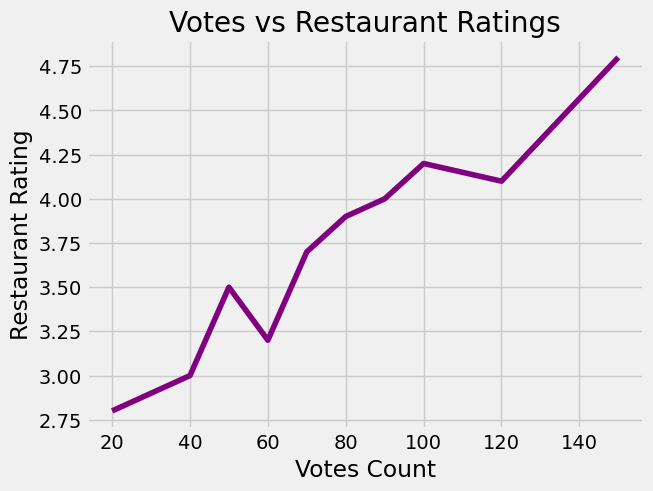

"\nThis line graph visualizes the relationship between the number of votes a restaurant receives and its rating.\nThe data is sorted by 'votes_count' to show the trend of ratings as votes increase.\n\nWhile the line graph suggests a trend, it's important to remember that this is based on a limited dataset.\nThe line may not accurately represent the relationship for all restaurants or across a larger dataset.\nA scatterplot might be more appropriate if the goal is to show the raw data points without implying a continuous relationship.\n"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {'votes_count': [50, 100, 20, 150, 80, 60, 120, 40, 90, 70],
        'restaurant_rating': [3.5, 4.2, 2.8, 4.8, 3.9, 3.2, 4.1, 3.0, 4.0, 3.7]}
df = pd.DataFrame(data)
df['votes_count'] = pd.to_numeric(df['votes_count'], errors='coerce')
df['restaurant_rating'] = pd.to_numeric(df['restaurant_rating'], errors='coerce')

df = df.dropna(subset=['votes_count', 'restaurant_rating'])
df = df.sort_values('votes_count')

sns.lineplot(data=df, x='votes_count', y='restaurant_rating', color='purple')
plt.title('Votes vs Restaurant Ratings')
plt.xlabel('Votes Count')
plt.ylabel('Restaurant Rating')
plt.show()



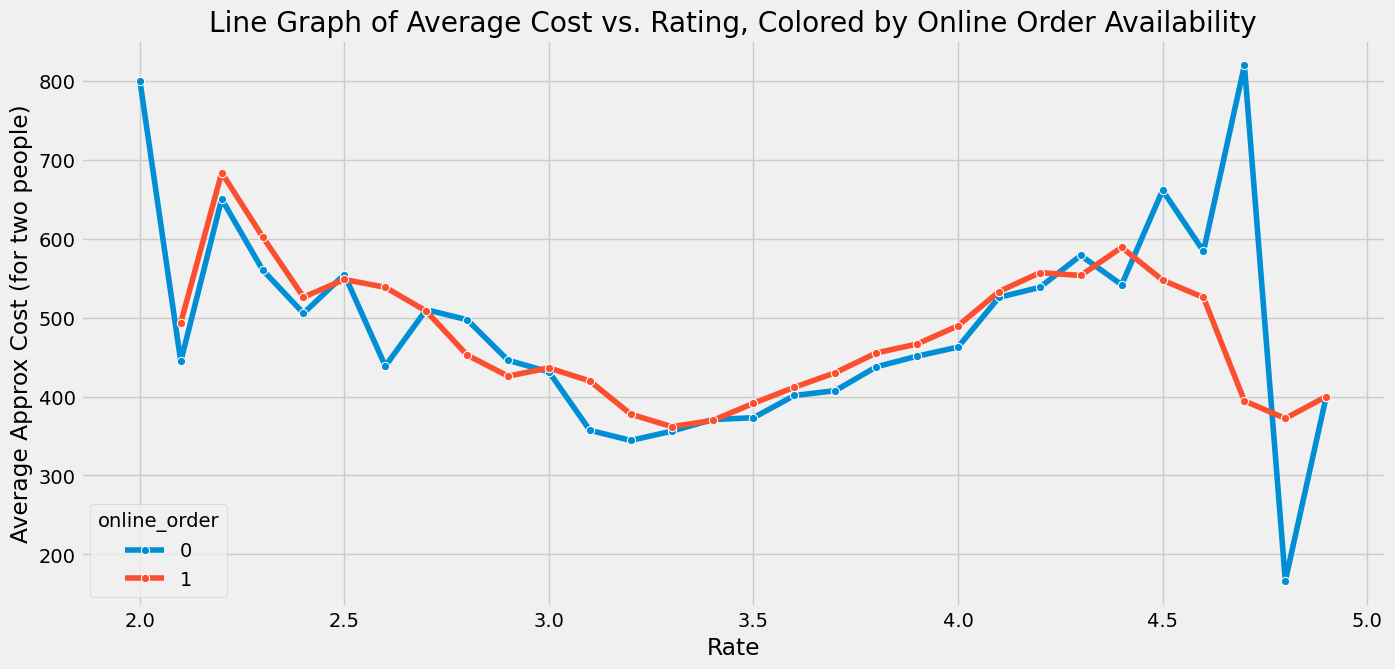

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sns

import matplotlib.ticker as mtick
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

try:
    data = pd.read_csv('zomato.csv')
    df = data.copy()
except FileNotFoundError:
    print("Error: Dataset file not found.")
    df = pd.DataFrame()  # Empty DataFrame to prevent crashes

if not df.empty and {'rate', 'approx_cost(for two people)', 'online_order'}.issubset(df.columns):
   
    df['rate'] = df['rate'].astype(str).str.replace('/5', '', regex=False)
    df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
    df = df.dropna(subset=['rate'])

    df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
    df = df.dropna(subset=['approx_cost(for two people)'])

    df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
    df = df.dropna(subset=['online_order'])
s
    df_grouped = df.groupby(['rate', 'online_order'])['approx_cost(for two people)'].mean().reset_index()

    df_grouped = df_grouped.sort_values('rate')

    plt.figure(figsize=(15, 7))
    sns.lineplot(x="rate", y="approx_cost(for two people)", hue="online_order", data=df_grouped, marker='o')
    plt.xlabel("Rate")
    plt.ylabel("Average Approx Cost (for two people)")
    plt.title("Line Graph of Average Cost vs. Rating, Colored by Online Order Availability")
    plt.grid(True)
    plt.show()
else:
    print("Error: Required columns are missing from the dataset or are incorrectly named.")